# **1. Perkenalan Dataset**


## **Analisis Faktor Retensi dan Churn Pengguna Platform Spotify**


---


Dari banyak platform streaming yang ada, Spotify merupakan salah satu platform yang paling terkemuka dan memiliki banyak pengguna. Meskipun demikian, dalam persaingan yang semakin ketat terdapat tantangan dalam mempertahankan pengguna agar tidak berhenti berlangganan (*churn*) . Oleh karena itu, dilakukan analisis komprehensif terhadap pola *churn* pada setiap layanan langganan yang diberikan, baik paket Free, Premium, Student, maupun Family.

Ada banyak faktor dapat memengaruhi *churn*, baik harga langganan, kualitas layanan, pengalaman pengguna, perilaku penggunaan, serta promosi dan *bundling*.
Selain itu umur dan berapa lama waktu yg digunakan untuk mendengarkan juga bisa menjadi faktor seorang pengguna akan *churn*. Pada pengguna layanan *free* pastinya akan cenderung terganggu karena memiliki *skip rate* yang tinggi, ini bisa menjadi salah satu faktor pengguna akan berpindah langganan atau bahkan *churn*.

Dataset spotifychurn_raw.csv merupakan data yang berisikan survei yang diambil pada tahun 2025 terhadap 8.000 pengguna Spotify dengan berbagai umur, negara, dan langganan yang digunakan.
Dengan dataset ini, akan dilakukan analisis segmentasi pengguna berdasarkan pola penggunaannya.

Variabel target yaitu fitur is_churned yang memilki:
#####- nilai 0, yaitu pengguna tidak akan berlangganan
#####- nilai 1, yaitu pengguna akan berlangganan
merupakan kunci variabel yang nantinya akan dihubungkan dengan beberapa fitur untuk mengetahui pola penggunannya.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [183]:
from google.colab import drive
drive.mount('/content/drive')
url = "https://drive.google.com/uc?id=1drEs8p2VR7jMzICttWhwOU98cfx8o4U3"
df = pd.read_csv(url)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [185]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [186]:
# Periksa nilai null
df.isnull().sum()

,0
user_id,0
gender,0
age,0
country,0
subscription_type,0
listening_time,0
songs_played_per_day,0
skip_rate,0
device_type,0
ads_listened_per_week,0


In [187]:
# Periksa nilai unik pada kolom kategorik
df.select_dtypes(include='object').nunique()

,0
gender,3
country,8
subscription_type,4
device_type,3


In [188]:
# Melihat statistik deskriptif
df.describe()

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,37.662125,154.068250,50.127250,0.300127,6.943875,0.747750,0.258875
std,2309.54541,12.740359,84.015596,28.449762,0.173594,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,8000.00000,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


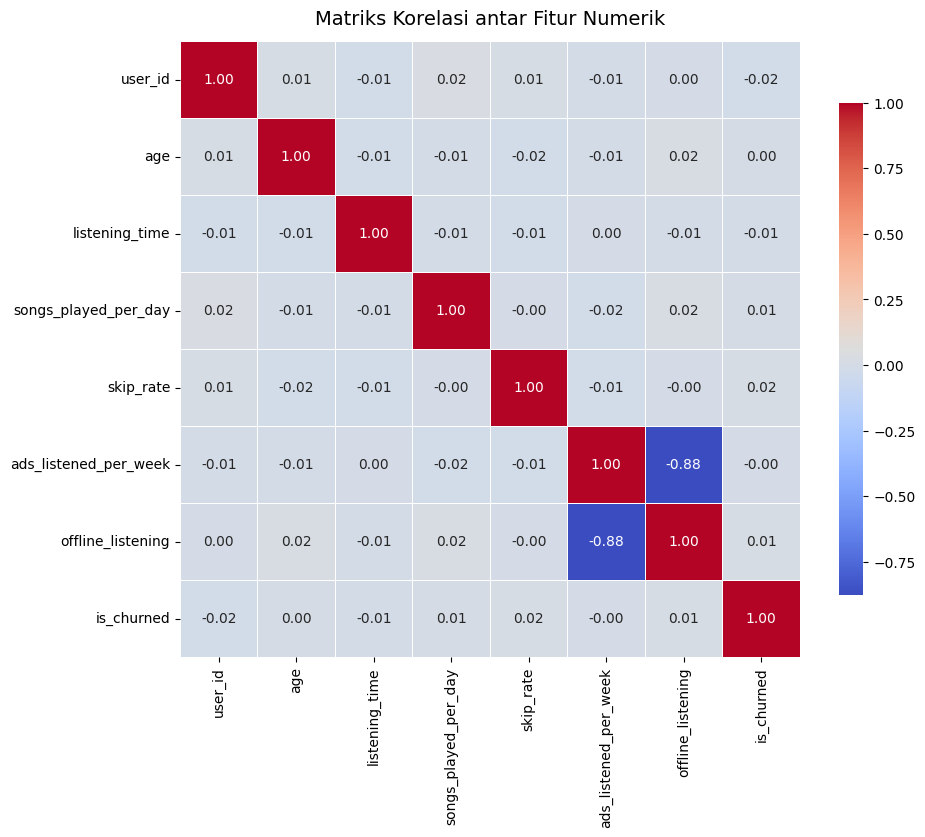

In [189]:
# Matriks korelasi
df_num = df.select_dtypes(include=["int64", "float64"])
corr_matrix = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Matriks Korelasi antar Fitur Numerik", fontsize=14, pad=12)
plt.show()

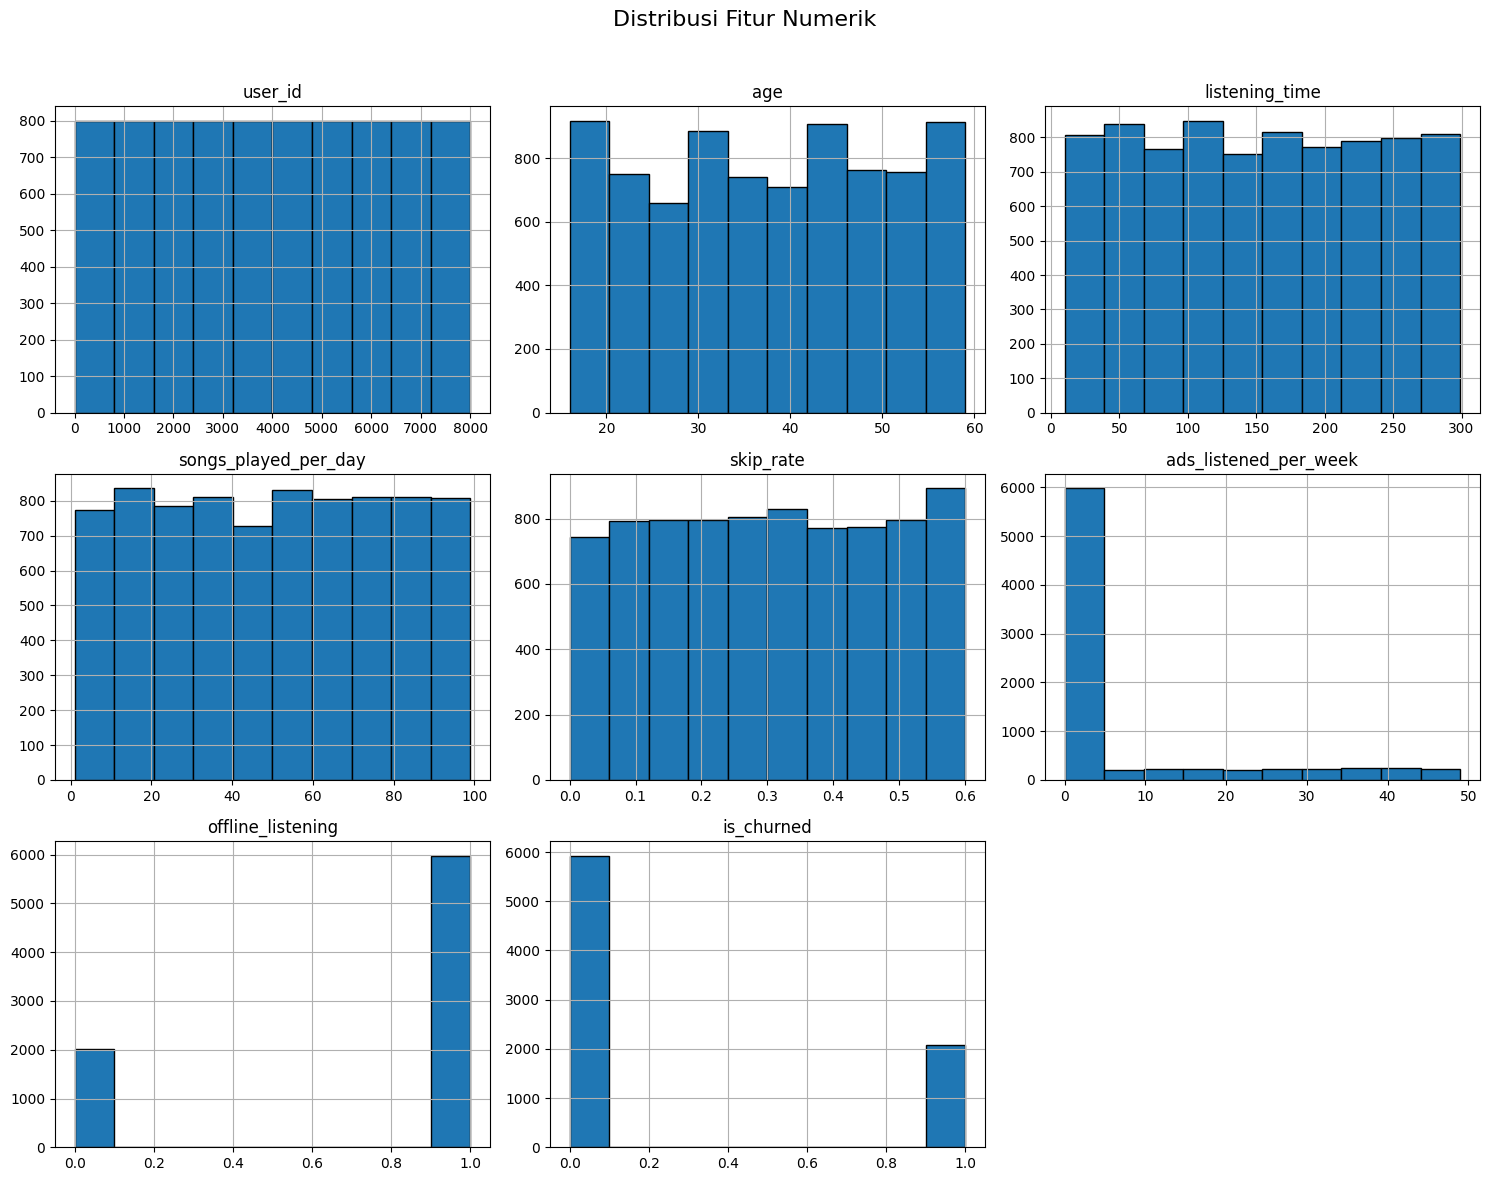

In [190]:
# Distribusi semua fitur numerik
df_num = df.select_dtypes(include=["int64", "float64"])

df_num.hist(
    figsize=(15, 12),
    edgecolor="black"
)
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

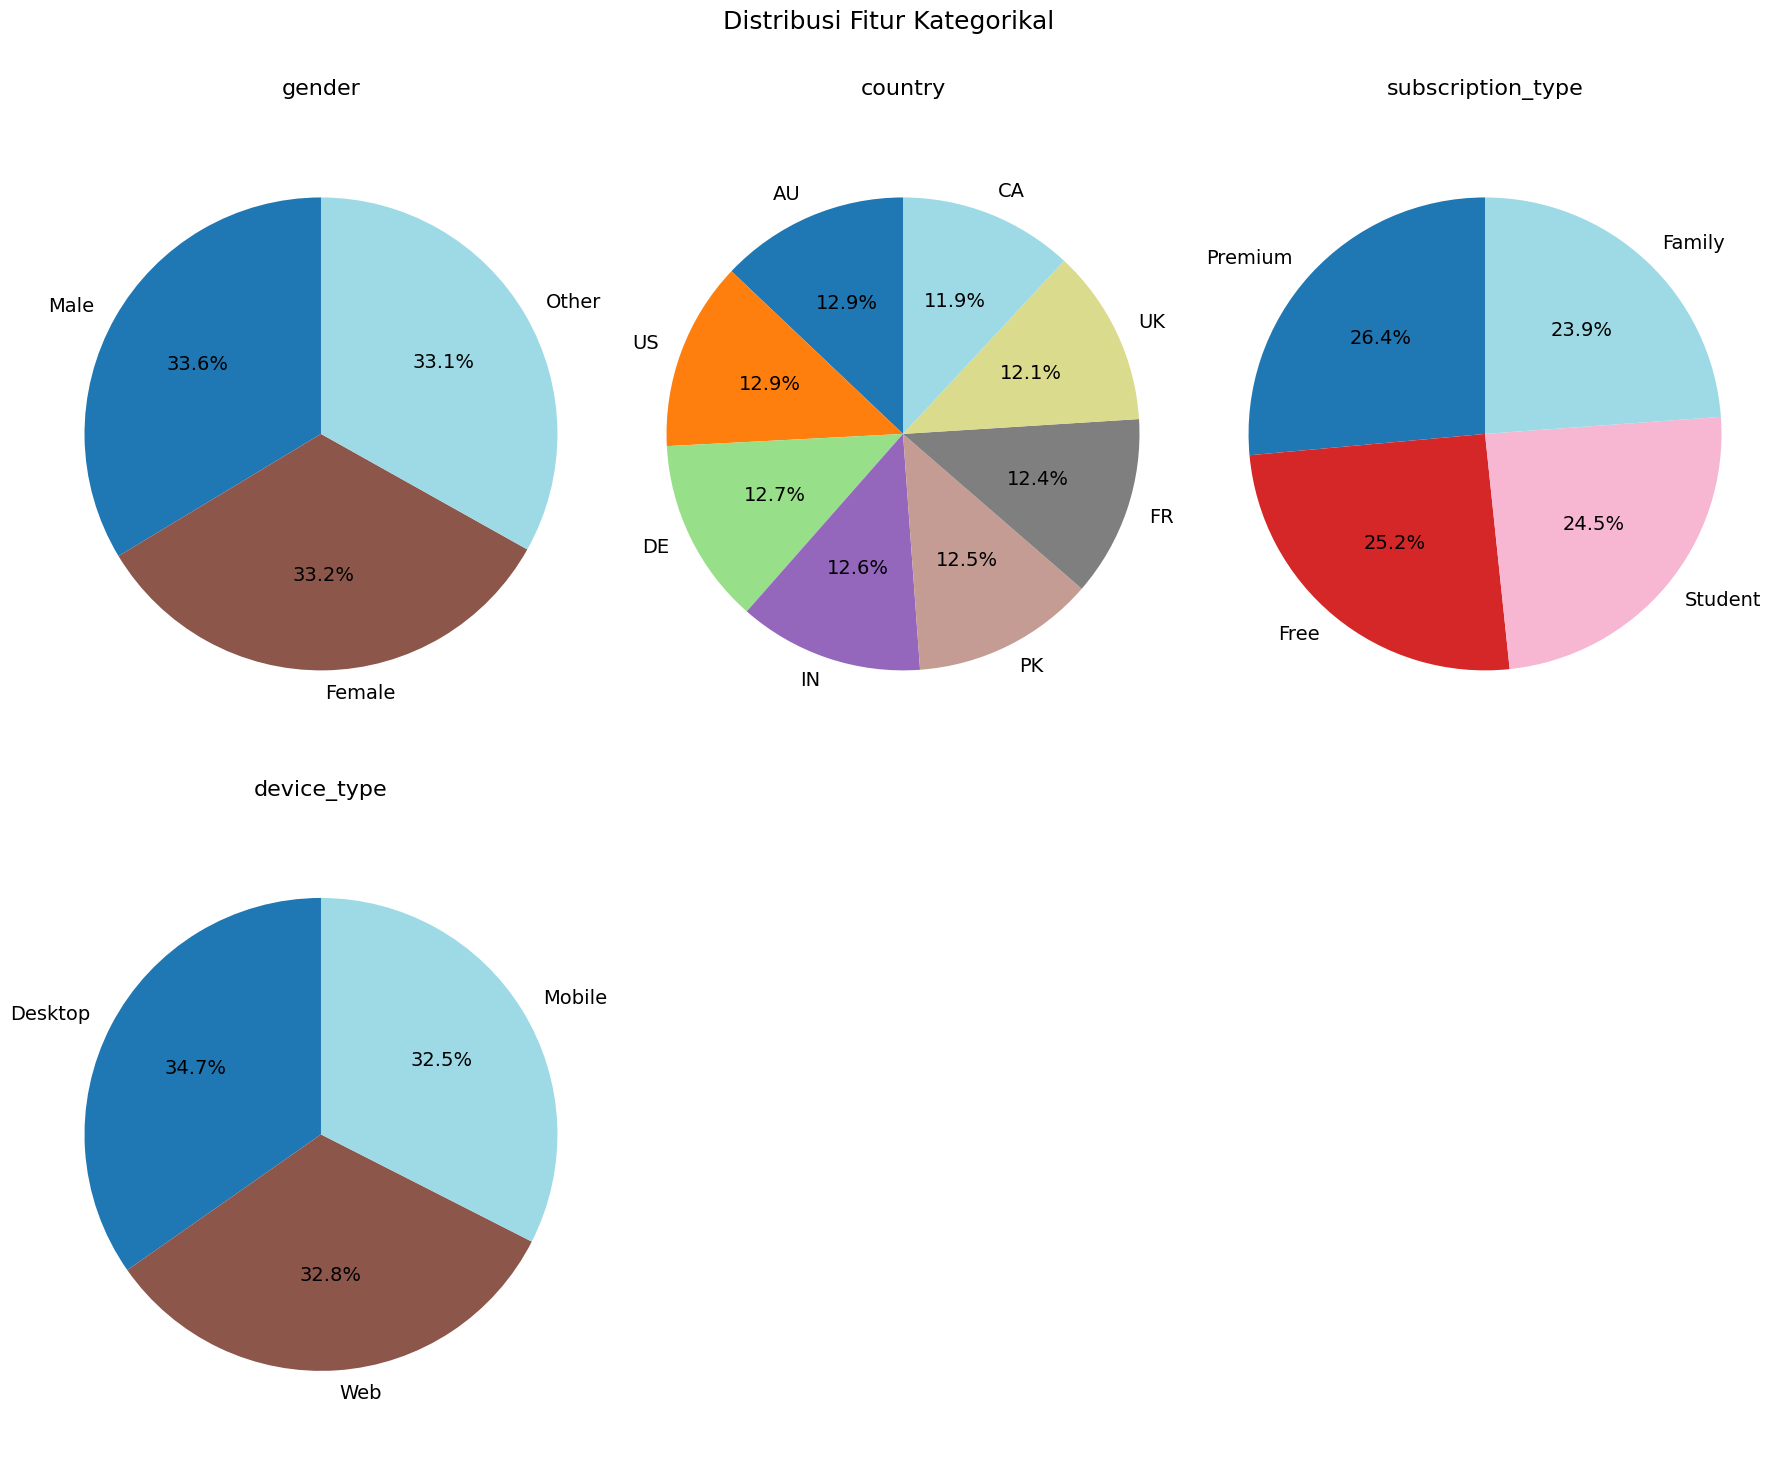

In [191]:
# Distribusi semua fitur kategorik
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(18, 15))
plt.suptitle("Distribusi Fitur Kategorikal", fontsize=18)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i)
    counts = df[col].value_counts()
    counts.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        cmap='tab20',
        textprops={'fontsize': 14})

    plt.title(f'{col}', fontsize=16)
    plt.ylabel('')
    plt.axis('equal')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

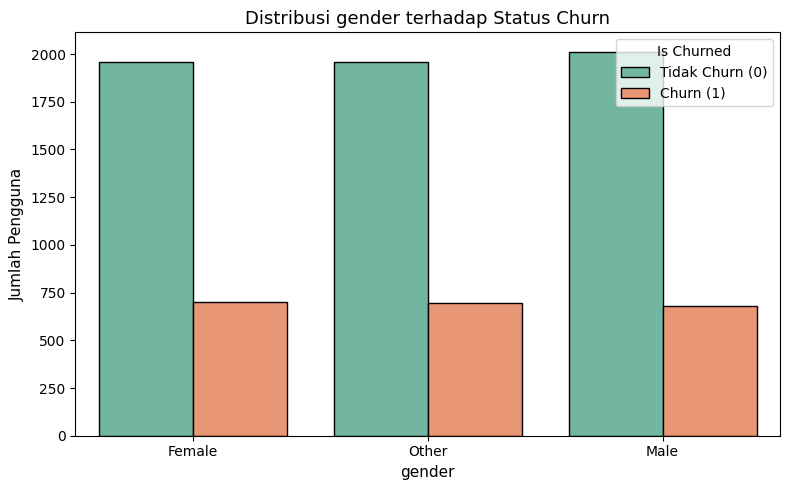

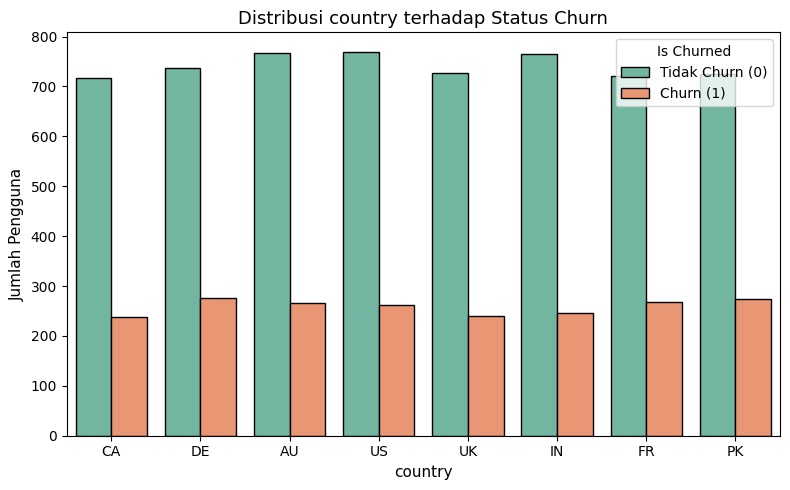

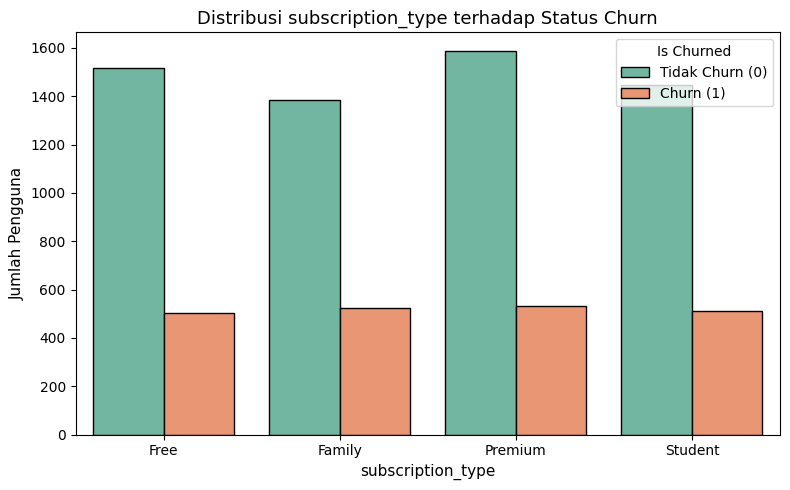

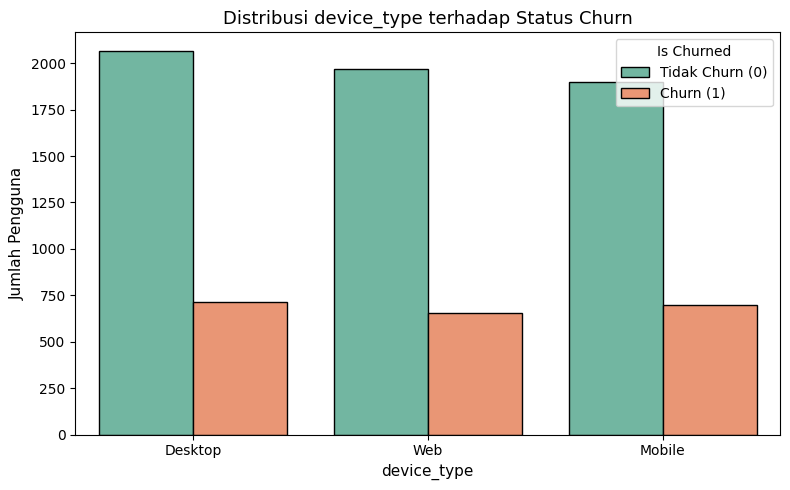

In [192]:
# Visualisasi distribusi fitur kategorik vs churn (berlangganan)
cat_features = df.select_dtypes(include=['object']).columns

for col in cat_features:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(
        x=col,
        hue="is_churned",
        data=df,
        palette="Set2",
        edgecolor="black")

    plt.title(f"Distribusi {col} terhadap Status Churn", fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Jumlah Pengguna", fontsize=11)
    plt.legend(title="Is Churned", labels=["Tidak Churn (0)", "Churn (1)"])
    plt.tight_layout()
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [193]:
# Periksa data kosong
df.isnull().sum()
# Menghapus data kosong jika ada
df = df.dropna()

In [194]:
# Menghapus data duplikat
df.duplicated().sum()

# Menghapus data duplikat jika ada
df = df.drop_duplicates()

In [195]:
# Encoding fitur kategorik
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

In [196]:
# Standarisasi untuk fitur numerik
categorical_features = ['gender', 'country', 'subscription_type', 'device_type']

num_cols = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if col not in categorical_features + ['is_churned']]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [197]:
# Mendeteksi dan menanganani outlier
z_scores = np.abs(stats.zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]

print("Jumlah data sebelum outlier removal:", df_outlier.shape[0])
print("Jumlah data setelah outlier removal:", df_cleaned.shape[0])

Jumlah data sebelum outlier removal: 8000
Jumlah data setelah outlier removal: 7926


In [198]:
# Membaca hasil preprocessing
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,-1.731834,0,1.282452,1,1,-1.524434,-0.953574,-0.576827,0,1.766611,-1.721720,1
1,-1.731401,2,-0.365956,2,0,-0.155555,0.417349,0.229702,2,-0.509938,0.580814,0
2,-1.730968,1,0.026522,0,2,0.534836,-0.426296,-1.498575,1,-0.509938,0.580814,1
3,-1.730535,0,-1.229408,1,3,-1.405401,-1.691763,0.056875,1,-0.509938,0.580814,0
4,-1.730102,2,-0.679939,7,0,1.141904,0.241590,0.344921,1,-0.509938,0.580814,1


In [204]:
# Simpan hasil preprocessing
df.to_csv('spotifychurn_preprocessing.csv', index=False)

In [199]:
# Import fungsi otomatis dari file automate_Rosita_Angel_Cahyadi.py
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks')

from automate_Rosita_Angel_Cahyadi import full_preprocessing_pipeline
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spotify_churn_dataset.csv')

# Tahap preprocessing
df_clean = full_preprocessing_pipeline(df_raw)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Preprocessing selesai
Dataset tersimpan di: /content/drive/MyDrive/Colab Notebooks/spotifychurn_preprocessing.csv


In [200]:
# Membaca hasil prepocessing dari fungsi automate yang telah dibuat
df_clean.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,-1.731834,0,1.282452,1,1,-1.524434,-0.953574,-0.576827,0,1.766611,-1.721720,1
1,-1.731401,2,-0.365956,2,0,-0.155555,0.417349,0.229702,2,-0.509938,0.580814,0
2,-1.730968,1,0.026522,0,2,0.534836,-0.426296,-1.498575,1,-0.509938,0.580814,1
3,-1.730535,0,-1.229408,1,3,-1.405401,-1.691763,0.056875,1,-0.509938,0.580814,0
4,-1.730102,2,-0.679939,7,0,1.141904,0.241590,0.344921,1,-0.509938,0.580814,1


In [206]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>